In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from model import TinyYoloModel
from data import get_generator
from loss import YoloLoss

In [3]:
generator = get_generator(image_size=(448, 448), batch_size=32)

# Check generated images

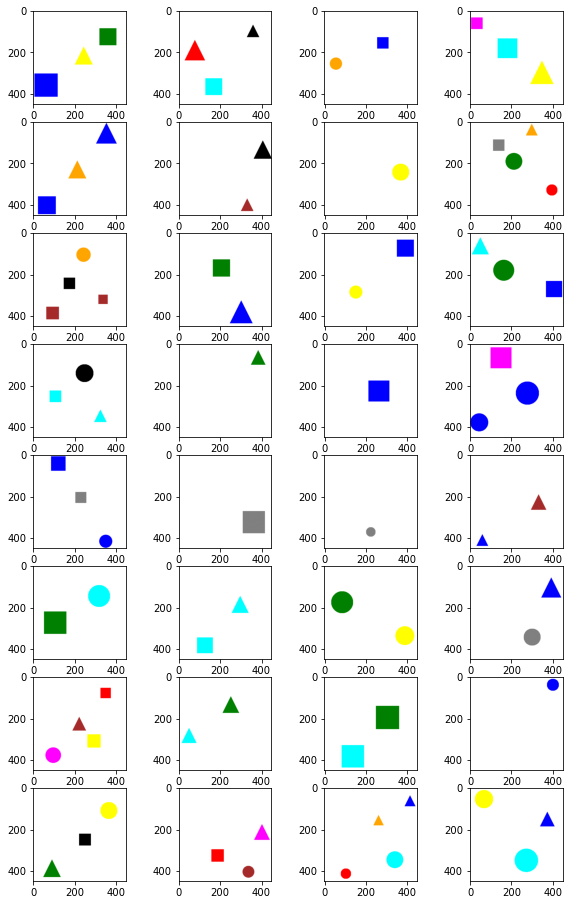

In [19]:
fig, axes = plt.subplots(8, 4, figsize=(10, 16))

batch = next(generator())

for index in range(32):
    axes[index//4, index%4].imshow(batch[0][index])
    
plt.show()

# Train until loss < 1

In [ ]:
yolo_model = TinyYoloModel(input_image_shape=(448, 448, 3), num_classes=3, num_boxes_per_cell=1)

loss_object = YoloLoss()
loss_object.config(num_classes=3, num_boxes_per_cell=1)

optimizer = tf.keras.optimizers.Adam()

epoch = 1

while True:
    batch = next(generator())

    with tf.GradientTape() as tape:
        result = yolo_model(batch[0])
        loss_value = loss_object(batch[1], result)
        grads = tape.gradient(loss_value, yolo_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, yolo_model.trainable_variables))
        print("Epoch {} loss {}".format(epoch, loss_value.numpy().mean()))
        
        if loss_value.numpy().mean() < 1:
            break

    if epoch % 100 == 0:
        yolo_model.save_weights("./results/tiny_yolo_model.h5")
    
    epoch += 1
